<a href="https://colab.research.google.com/github/nick1287/Airlines/blob/main/Random_Forest%2BAirline%2BDuran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El proyecto es se trata de analizar las variables para determinar cuales son los motivos de los delays.


1.Airline (Nombre de la aerolinea)
2.Flight (Numero de vuelo)
3.Airport From (Aeropuerto Origen)
4.Airport To (Aeropuerto Destino)
5.DayOfWeek (Dia de la semana)
6.Time (Duracion del vuelo)
7.Length (Distancia recorrida)
8.Delay (Si llego tarde o no)


https://www.kaggle.com/code/jominjae/airline-delay-prediction-logistic-decisiontree/data

# Random forest

Se utilizara esta metodologia para ver si existe una mayor probabilidad de clasificacion correcta.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder #Para convertir Airline, AirportFrom, AirportTo,DayOfWeek en variables categoricas

In [ ]:
df = pd.read_csv('Airlines.csv',index_col=0)
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,3,30,202,0


In [ ]:
df.shape

(539383, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539383 entries, 1 to 539383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 37.0+ MB


In [ ]:
airfrom = df['AirportFrom'].value_counts() #Hago un conteo de los aeropuestos origen mas importantes
airto = df['AirportTo'].value_counts() #Hago un conteo de los aeropuestos destino mas importantes
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others') #Hago el top 50
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others') #Hago el top 50


In [ ]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
OHE.fit(df[['AirportFrom','Airline','AirportTo','DayOfWeek']])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
def get_ohe(df):
    temp_df = pd.DataFrame(data=OHE.transform(df[['AirportFrom','Airline','AirportTo','DayOfWeek']]), columns=OHE.get_feature_names_out())
    #C = df.drop(columns=['AirportFrom'], axis=1, inplace=False)
    C = df
    C = pd.concat([C.reset_index(drop=True), temp_df], axis=1)
    return C

In [ ]:
df_allvariables = get_ohe(df)
df_allvariables

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFrom_ABQ,AirportFrom_ATL,...,AirportTo_STL,AirportTo_TPA,AirportTo_others,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,CO,269,SFO,IAH,3,15,205,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,US,1558,PHX,CLT,3,15,222,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,AA,2400,LAX,DFW,3,20,165,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,AA,2466,SFO,DFW,3,20,195,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,AS,108,others,SEA,3,30,202,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,CO,178,others,SNA,5,1439,326,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539379,FL,398,SEA,ATL,5,1439,305,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539380,FL,609,SFO,MKE,5,1439,255,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539381,UA,78,HNL,SFO,5,1439,313,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_onlyvarnum = df_allvariables.drop(columns=['AirportFrom','Airline','AirportTo','DayOfWeek','Flight'],axis=1)
df_onlyvarnum

,Time,Length,Delay,AirportFrom_ABQ,AirportFrom_ATL,AirportFrom_AUS,AirportFrom_BNA,AirportFrom_BOS,AirportFrom_BWI,AirportFrom_CLE,...,AirportTo_STL,AirportTo_TPA,AirportTo_others,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,15,205,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,15,222,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20,165,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,20,195,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,30,202,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,1439,326,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539379,1439,305,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539380,1439,255,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539381,1439,313,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Calculamos con todas las variables categoricas convertidas a numero y las numericas.

In [ ]:
#Separamos en X e y
X = df_allvariables.drop(columns=['AirportFrom','Airline','AirportTo','DayOfWeek','Flight','Delay'],axis=1)
y = df_allvariables['Delay']

In [ ]:
#Se crea un random forest
model = RandomForestClassifier(random_state=11, n_estimators=200,class_weight="balanced", max_features="log2")

In [ ]:
#Separamos en train y test
(X_train, X_test,y_train, y_test) = train_test_split(X,y,stratify=y,test_size=0.30,random_state=11)

## Entrenamiento todas las variables

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:871: RuntimeWarning: invalid value encountered in true_divide
  proba /= len(self.estimators_)


AttributeError: ignored

In [ ]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

In [ ]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

## Test 2 - Solo las variables numericas.

In [ ]:
df

In [ ]:
X2 = df.drop(columns=['AirportFrom','Airline','AirportTo','DayOfWeek','Flight','Delay'],axis=1)
y2 = df['Delay']

In [ ]:
model2 = RandomForestClassifier(random_state=11, n_estimators=200,class_weight="balanced", max_features="log2")

In [ ]:
#Separamos en train y test
(X_train2, X_test2,y_train2, y_test2) = train_test_split(X2,y2,stratify=y2,test_size=0.30,random_state=11)

Entrenamiento

In [ ]:
model2.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [ ]:
y_test_pred2 = model2.predict(X_test2)

In [ ]:
# verificar características importantes
feature_importances_df2 = pd.DataFrame(
    {"feature": list(X2.columns), "importance": model2.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df2

,feature,importance
0,Time,0.587211
1,Length,0.412789


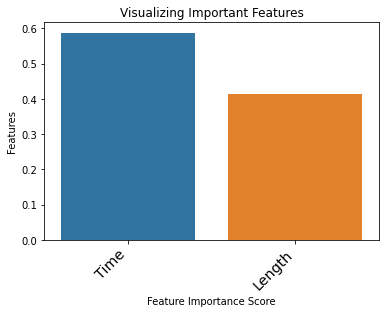

In [ ]:
# visualizarcaracterísticas importantes

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df2['feature'], y=feature_importances_df2['importance'])
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# Evaluar los indicadores de desempeño predictivo del modelo

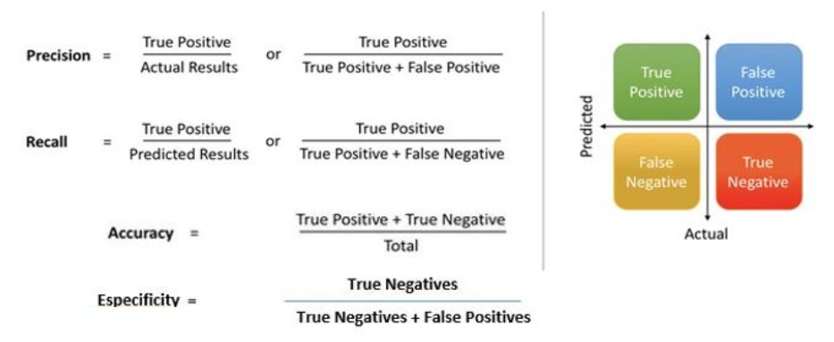

1. Calcular la métrica Accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test2, y_test_pred2)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6267960325062572


2. Crear la Matriz de Confusión

[[56934 32802]
 [27588 44491]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


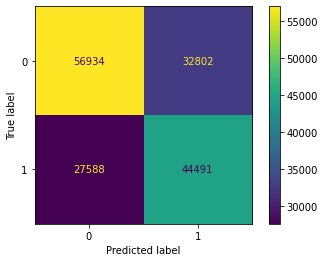

In [ ]:
#Matriz de Confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test2, y_test_pred2))

#Ploteamos la Matriz
plot_confusion_matrix(model2, X_test2, y_test2)
plt.show()

3. Calcular la métrica Precision

In [ ]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test2, y_test_pred2)}")

Precision Score of the classifier is: 0.5756148680993104


4. Calcular la métrica Recall

In [ ]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test2, y_test_pred2)}")

Recall Score of the classifier is: 0.617253291527352


5. Calcular la métrica F1 score

In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test2, y_test_pred2)}")

F1 Score of the classifier is: 0.595707361486758


6. Calcular y plotear la Curva ROC

AUC for our classifier is: 0.6727535598461873


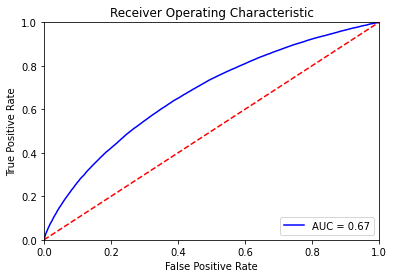

In [ ]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

class_probabilities = model2.predict_proba(X_test2)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test2, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Conclusion**

Las variables numéricas no tienen un alto impacto en la determinación de que si un vuelo fue demorado o no. Para nosotros las variables como que aerolínea viajo, o el aeropuerto de origen o destino es son importantes. Se intentó subclasificarlo, pero cuando se realiza la composición binaria de estas medidas, se cae en el overfiting.